# UMAP dim reduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

#import seaborn as sns

import umap
# import umap.plot

%matplotlib inline

In [2]:
# Load the data

# orig_X = np.loadtxt('feature data/final_Data_20k/X_reduced.csv', delimiter=',')
# orig_Y = np.loadtxt('feature data/final_Data_20k/Y_reduced.csv', delimiter=',')
# orig_gal_id = np.loadtxt('feature data/final_Data_20k/gal_id_reduced.csv', delimiter=',')
# orig_colorby = np.loadtxt('feature data/final_Data_20k/colorby_reduced.csv', delimiter=',')

X = np.loadtxt('feature data/final_Data_20k/X_reduced.csv', delimiter=',')
Y = np.loadtxt('feature data/final_Data_20k/Y_reduced.csv', delimiter=',')
gal_id = np.loadtxt('feature data/final_Data_20k/gal_id_reduced.csv', delimiter=',')
colorby = np.loadtxt('feature data/final_Data_20k/colorby_reduced.csv', delimiter=',')


In [3]:
# remove first row!
X = X[1:,:]
Y = Y[1:,:]
gal_id = gal_id[1:]
colorby = colorby[1:]
print(X.shape)
print(Y.shape)
print(gal_id.shape)
print(colorby.shape)


# Reduce data size by randomly selecting from set 

# rows,cols = orig_X.shape
# new_size = 1000

# # Selects random indices over range of galaxies
# x_inds = np.random.choice(rows,new_size)

# # creates X,Y,gal_id,colorby that I'll use in analysis
# X = orig_X[x_inds];
# Y = orig_Y[x_inds];
# gal_id = orig_gal_id[x_inds];
# colorby = orig_colorby[x_inds];


(20000, 512)
(20000, 37)
(20000,)
(20000,)


In [5]:
# Fit Umap model to the data

umap_2 = umap.UMAP(n_components = 2,n_neighbors=50,min_dist=0.15,).fit(X)
umap_7 = umap.UMAP(n_components = 7,n_neighbors=50,min_dist=0.15,).fit(X)


points = umap_2.embedding_
print(points)

/opt/anaconda3/envs/umap/lib/python3.8/site-packages/numba/typed_passes.py:292: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../opt/anaconda3/envs/umap/lib/python3.8/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  warnings.warn(errors.NumbaPerformanceWarning(msg,
/opt/anaconda3/envs/umap/lib/python3.8/site-packages/numba/typed_passes.py:292: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../opt/anaconda3/envs/umap/lib/python3.8/site-pa

[[ 1.441612    5.1161623 ]
 [-2.635384    0.1901483 ]
 [-6.349698    0.17625794]
 ...
 [ 5.3397264  -0.93627775]
 [ 5.267371   -0.4899824 ]
 [-2.8993852  -1.6680865 ]]


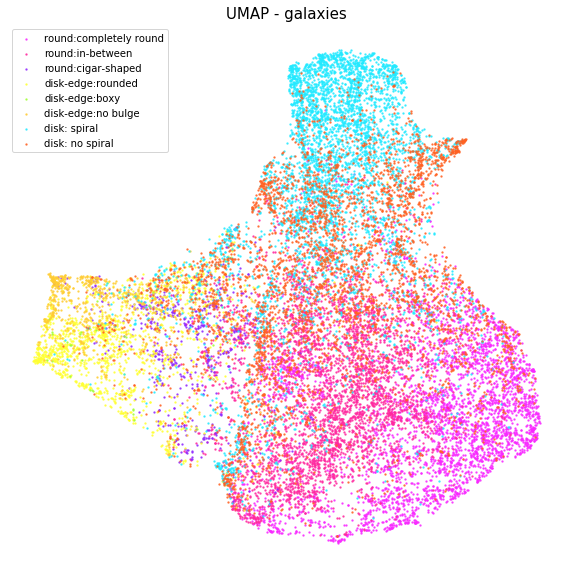

In [7]:
umap_coords = points

gal_classes = ['round:completely round','round:in-between','round:cigar-shaped', \
              'disk-edge:rounded','disk-edge:boxy','disk-edge:no bulge', \
              'disk: spiral','disk: no spiral']
# Original colors
# colorsG = ['#11ffeb','#ff4911','#ffbd7a', '#7a7aff', '#fd7aff', '#ffff7a']
# Colors based on larger categories - so related categories have similar colors
colorsG = ['#f829ff','#ff299f','#9029ff', '#ffff33', '#a0ff33', '#ffcc33','#22e9ff','#ff6122']

plt.figure(figsize = (10,10))
# plt.subplot(2,1,1)
for c, i, lab in zip(colorsG, [0, 1, 2, 3, 4, 5, 6, 7], gal_classes):
    plt.scatter(umap_coords[colorby==int(i),0], umap_coords[colorby==int(i),1], alpha=0.7, c=c, label=lab, s=2)
plt.legend()
plt.title('UMAP - galaxies',fontsize=15)
plt.axis("off")
[i.set_linewidth(0.4) for i in plt.gca().spines.values()]

# plt.subplot(2,1,2)
# for c, i, lab in zip(colorsG, [0, 1, 2, 3, 4, 5, 6, 7], gal_classes):
#     plt.scatter(pca_coordsG[Y==int(i),0], pca_coordsG[Y==int(i),1], alpha=0.7, c=c, label=lab)
# #plt.legend()
# plt.title('pca - galaxies',fontsize=15)
# [i.set_linewidth(0.4) for i in plt.gca().spines.values()]

plt.show()

# Clustering

In [9]:
# single plot
def kMeansPlotSingle(proj_data,clust_data,clusters,n_components,dim_reduct,title=None): 
    km_proj = KMeans(
        n_clusters=clusters, init='k-means++',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )
    km_clust = KMeans(
        n_clusters=clusters, init='k-means++',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )

    X_tsne_2 = proj_data
    X_tsne_3 = clust_data

    y_km = km_proj.fit_predict(proj_data)
    y_km_clust = km_clust.fit_predict(clust_data)

    #print(y_km)
    plt.figure(figsize = (10,10))
#     colors = ['#ff8543','#43b7ff','#c743ff','#ffe343','#50ff2d','#79fff8','#ff0084','#9c7bff'];
    colors = ['#f829ff','#ff299f','#9029ff', '#ffff33', '#a0ff33', '#ffcc33','#22e9ff','#ff6122']
    for i in range(clusters):
        plt.scatter(proj_data[y_km_clust == i, 0],proj_data[y_km_clust == i, 1],c=colors[i],s=2)
    # Plot the centers
    if n_components == 2 and dim_reduct=='t-SNE':
        plt.plot(km_proj.cluster_centers_[:,0],km_proj.cluster_centers_[:,1],"ok",ms=10)
    if title:
        plt.title(title,fontsize=15)
    else:
        plt.title("K-means with {} clusters on {} ".format(clusters,dim_reduct),fontsize=15)
    plt.axis("off")
    [i.set_linewidth(0.4) for i in plt.gca().spines.values()]

    
    plt.show()

In [10]:
# K - Means 
from sklearn.cluster import KMeans

# plot tSNE
def kMeansPlot(proj_data,clust_data,clusters,n_components,dim_reduct): 
    km = KMeans(
        n_clusters=clusters, init='k-means++',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )
    
    y_km = km.fit_predict(clust_data)

    #print(y_km)
    plt.figure(figsize = (20,10))
#     colors = ['#ff8543','#43b7ff','#c743ff','#ffe343','#50ff2d','#79fff8','#ff0084','#9c7bff'];
    colors = ['#f829ff','#ff299f','#9029ff', '#ffff33', '#a0ff33', '#ffcc33','#22e9ff','#ff6122']
    plt.subplot(1,2,1)
    for i in range(clusters):
        plt.scatter(proj_data[y_km == i, 0],proj_data[y_km == i, 1],c=colors[i],s=30)
    # Plot the centers
#     if n_components == 2 and dim_reduct=='t-SNE':
#         plt.plot(km.cluster_centers_[:,0],km.cluster_centers_[:,1],"ok",ms=10)
    plt.title("K-means {} clustered on {} dimensions".format(dim_reduct,n_components),fontsize=15)
    plt.axis("off")
    [i.set_linewidth(0.4) for i in plt.gca().spines.values()]
    
    
    plt.show()

In [11]:
# Calculate k-means costs
def kmCost(data,n_components,dim_reduct):
    costs_km = []
    for i in range(1, 11):
        km = KMeans(
            n_clusters=i, init='k-means++',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0
        )
        km.fit(data)
        costs_km.append(km.inertia_)

    plt.figure(figsize = (7,5))
    plt.plot(range(1,11),costs_km,'--m',marker='o')
    plt.xlabel("centers")
    plt.ylabel("cost")
    plt.title("k-means elbow on {} with {} components".format(dim_reduct,n_components),fontsize='15')
    plt.show()

In [12]:
# Load other projections
tsne_coords = np.load('./dim reduction data/tsne_coords.npy')
LDA_coords = np.load('./dim reduction data/LDA_coords.npy')
PCA_coords = np.load('./dim reduction data/PCA_coords.npy')

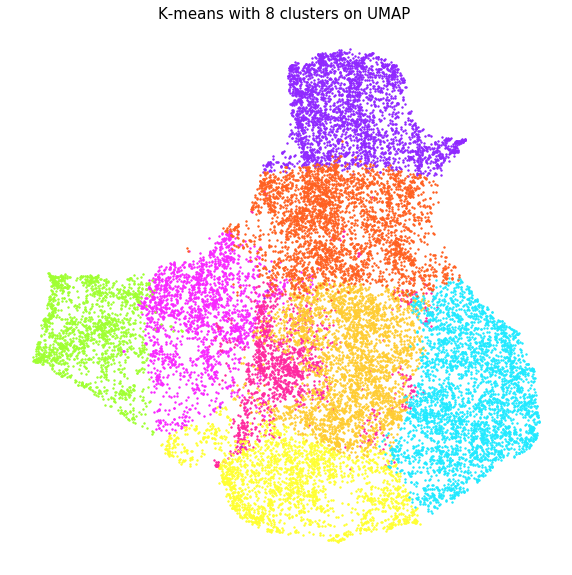

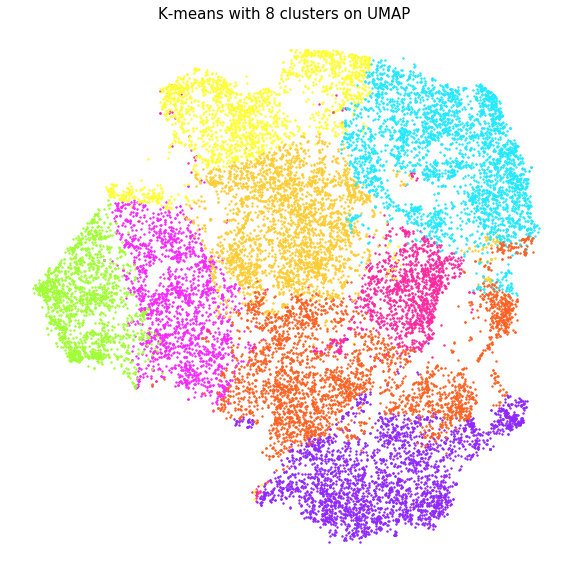

In [15]:

umap2 = umap_2.embedding_
umap7 = umap_7.embedding_
kMeansPlotSingle(umap2,umap7,8,7,'UMAP')
kMeansPlotSingle(tsne_coords,umap7,8,2,'UMAP')